# Ambil data twitter

In [3]:


# Cari topik yang sedang trending dengan where on earth id
import pandas as pd
import tweepy

consumer_key = "1NNYqRQXn7YQhl9BbZ8AU5nfB"
consumer_secret = "1of7yfcAelwFXo27tOBXRovuEoABgmhEF92UgJt93ShTgnrTNP"
access_token = "1302466796323139585-lCJcTWn7myHi9UEAxOl2Tl1k1l1ov5"
access_token_secret = "BhOF41Y1raK3TsPAE16afgdsT9jG6uZRY8QiHozL7olMI"


#inisiasi variabel

auth=tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth)

#ambil trending topic
Indonesia_woe = 23424846

trends=api.trends_place(Indonesia_woe)
print(trends)

for item in(trends[0]['trends']):
    print(item['name'])

[{'trends': [{'name': 'Lee Know', 'url': 'http://twitter.com/search?q=%22Lee+Know%22', 'promoted_content': None, 'query': '%22Lee+Know%22', 'tweet_volume': 67618}, {'name': '#WujudkanVisiIndonesiaMaju', 'url': 'http://twitter.com/search?q=%23WujudkanVisiIndonesiaMaju', 'promoted_content': None, 'query': '%23WujudkanVisiIndonesiaMaju', 'tweet_volume': None}, {'name': 'SENSATIONAL TREASURE', 'url': 'http://twitter.com/search?q=%22SENSATIONAL+TREASURE%22', 'promoted_content': None, 'query': '%22SENSATIONAL+TREASURE%22', 'tweet_volume': 17977}, {'name': 'Selamat Hari Dokter Nasional', 'url': 'http://twitter.com/search?q=%22Selamat+Hari+Dokter+Nasional%22', 'promoted_content': None, 'query': '%22Selamat+Hari+Dokter+Nasional%22', 'tweet_volume': None}, {'name': 'Via Vallen', 'url': 'http://twitter.com/search?q=%22Via+Vallen%22', 'promoted_content': None, 'query': '%22Via+Vallen%22', 'tweet_volume': None}, {'name': '#FGDOmnibusLaw', 'url': 'http://twitter.com/search?q=%23FGDOmnibusLaw', 'prom

In [2]:
#mencari tweet tentang Vaksin
search_words = ("vaksin OR VAKSIN OR Vaksin COVID-19" )
date_since = "2020-10-21"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
                        q=new_search,
                        lang="id",
                        since=date_since,
                        tweet_mode='extended').items(300)
ciptaker= [tweet.full_text for tweet in tweets]
df=pd.DataFrame(ciptaker,columns=['tweet'])

In [3]:
df

,tweet
0,"Debat Pilpres AS, Trump Pede Vaksin Covid-19 S..."
1,Ini yang Harus Dilakukan Satgas Kobar Jelang P...
2,Anggota @DPR_RI @FraksiPKB @marwan_jafar doron...
3,Mengapresiasi Percepatan Penelitian Vaksin Cov...
4,Saat ini dunia sedang berusaha untuk menemukan...
...,...
295,Gub Jabar @ridwankamil siap untuk mnerima vaks...
296,"Presiden Brasil, menyatakan pihaknya tidak aka..."
297,Sukarelawan uji coba vaksin COVID-19 AstraZene...
298,Pemerintah Sebut Belum Ada Vaksin Covid-19 yan...


In [4]:
search_words = ("vaksin OR VAKSIN OR Vaksin COVID-19" )
date_since = "2020-10-20"
end_date="2020-10-22"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
                        q=new_search,
                        lang="id",
                        since=date_since,until=end_date,
                        tweet_mode='extended').items()
ciptaker= [[len(tweet.full_text),tweet.id,tweet.created_at,tweet.source,tweet.user.screen_name,tweet.favorite_count,tweet.full_text] for tweet in tweets]
df = pd.DataFrame(data=ciptaker, 
                    columns=['length','ID','Date','Source','user','Likes', "tweet"])
df

,length,ID,Date,Source,user,Likes,tweet
0,145,1319065127811837952,2020-10-21 23:56:48,Twitter for Android,syarifptk,0,*China Tegas Tidaak Akan Lakukan Vaksin Covid-...
1,228,1319064780934574080,2020-10-21 23:55:25,Twitter Web App,sumoburloff,0,@geloraco Belum menjamin bahwa org yg di vaksi...
2,119,1319063552938799106,2020-10-21 23:50:32,dlvr.it,FaktaNew5,0,Proses Uji Klinis Vaksin COVID-19 Tahap Tiga: ...
3,60,1319062462235172865,2020-10-21 23:46:12,idntimes live blog,idntimes,0,Para dokter sering terpapar COVID-19 https://t...
4,220,1319060465918464000,2020-10-21 23:38:16,Twitter for Android,chirp__john,0,Sukarelawa Vaksin Corona di Brasil Meninggal.\...
...,...,...,...,...,...,...,...
988,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,Presiden Joko Widodo atau Jokowi meminta komun...
989,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,WHO dan pemerintah Indonesia sudah bersepakat ...
990,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,WHO dan pemerintah Indonesia sudah bersepakat ...
991,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,"Edukasi vaksin covid-19 perlu disiapkan betul""..."


In [5]:
#save data di sql 
from sqlalchemy import create_engine
def save_sql(file,table):
  engine = create_engine(file, echo=True)
  sqlite_connection = engine.connect()
  sqlite_table =table
  df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')
  sqlite_connection.close()

In [6]:
file='sqlite:///TugasAkhir_Sanber.db'
table='Vaksin2'
save_sql(file,table)

2020-10-23 13:41:53,773 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-10-23 13:41:53,776 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 13:41:53,780 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-10-23 13:41:53,784 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 13:41:53,800 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Vaksin2")
2020-10-23 13:41:53,802 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 13:41:53,806 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Vaksin2")
2020-10-23 13:41:53,806 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 13:41:53,811 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Vaksin2" (
	"index" BIGINT, 
	length BIGINT, 
	"ID" BIGINT, 
	"Date" DATETIME, 
	"Source" TEXT, 
	user TEXT, 
	"Likes" BIGINT, 
	tweet TEXT
)


2020-10-23 13:41:53,812 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 13:41:53,857 INFO sqlalchemy.engine.b

In [7]:
import sqlite3
import numpy as np
#fungsi opendatabase
def open_database(file):
  conn = sqlite3.connect(file)
  df = pd.read_sql_query("SELECT * FROM Vaksin2", conn)
  print(df)


In [8]:
file='TugasAkhir_Sanber.db'
open_database(file)

     index  length                   ID                        Date  \
0        0     145  1319065127811837952  2020-10-21 23:56:48.000000   
1        1     228  1319064780934574080  2020-10-21 23:55:25.000000   
2        2     119  1319063552938799106  2020-10-21 23:50:32.000000   
3        3      60  1319062462235172865  2020-10-21 23:46:12.000000   
4        4     220  1319060465918464000  2020-10-21 23:38:16.000000   
..     ...     ...                  ...                         ...   
988    988     193  1318341161359081472  2020-10-20 00:00:01.000000   
989    989     205  1318341160998416386  2020-10-20 00:00:01.000000   
990    990     205  1318341160449069066  2020-10-20 00:00:00.000000   
991    991     226  1318341158632869891  2020-10-20 00:00:00.000000   
992    992     299  1318341158108614656  2020-10-20 00:00:00.000000   

                  Source          user  Likes  \
0    Twitter for Android     syarifptk      0   
1        Twitter Web App   sumoburloff      0   


In [9]:
df

,length,ID,Date,Source,user,Likes,tweet
0,145,1319065127811837952,2020-10-21 23:56:48,Twitter for Android,syarifptk,0,*China Tegas Tidaak Akan Lakukan Vaksin Covid-...
1,228,1319064780934574080,2020-10-21 23:55:25,Twitter Web App,sumoburloff,0,@geloraco Belum menjamin bahwa org yg di vaksi...
2,119,1319063552938799106,2020-10-21 23:50:32,dlvr.it,FaktaNew5,0,Proses Uji Klinis Vaksin COVID-19 Tahap Tiga: ...
3,60,1319062462235172865,2020-10-21 23:46:12,idntimes live blog,idntimes,0,Para dokter sering terpapar COVID-19 https://t...
4,220,1319060465918464000,2020-10-21 23:38:16,Twitter for Android,chirp__john,0,Sukarelawa Vaksin Corona di Brasil Meninggal.\...
...,...,...,...,...,...,...,...
988,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,Presiden Joko Widodo atau Jokowi meminta komun...
989,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,WHO dan pemerintah Indonesia sudah bersepakat ...
990,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,WHO dan pemerintah Indonesia sudah bersepakat ...
991,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,"Edukasi vaksin covid-19 perlu disiapkan betul""..."


In [10]:
df['user'].value_counts()

kompascom          19
republikaonline    19
detikHealth        19
detikcom           15
idntimes           14
                   ..
PolsekParang        1
Cilalalla           1
nangisbawang        1
Mark1IniKebumen     1
eradotid            1
Name: user, Length: 551, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   length  993 non-null    int64         
 1   ID      993 non-null    int64         
 2   Date    993 non-null    datetime64[ns]
 3   Source  993 non-null    object        
 4   user    993 non-null    object        
 5   Likes   993 non-null    int64         
 6   tweet   993 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 54.4+ KB


In [12]:
future_date=df['Date'].iloc[0]
past_date=df['Date'].iloc[943]
difference = (future_date - past_date)

total_seconds = difference.total_seconds()

total_seconds

168881.0

In [13]:
total_minute=total_seconds/60
total_minute



2814.6833333333334

In [14]:
Total_hour=total_seconds/3600
Total_hour

46.91138888888889

In [15]:
banyak_tweet=len(df['tweet'])
banyak_tweet

993

In [16]:
tweet_perdetik=banyak_tweet/total_seconds
tweet_permenit=banyak_tweet/total_minute
tweet_perjam=banyak_tweet/Total_hour
print('Rata-rata banyak tweet per detik',tweet_perdetik)
print('Rata-rata banyak tweet per menit',tweet_permenit)
print('Rata-rata banyak tweet per jam',tweet_perjam)

Rata-rata banyak tweet per detik 0.005879879915443419
Rata-rata banyak tweet per menit 0.3527927949266051
Rata-rata banyak tweet per jam 21.167567695596308


# Analisis Sentimen

In [17]:
df.head()

,length,ID,Date,Source,user,Likes,tweet
0,145,1319065127811837952,2020-10-21 23:56:48,Twitter for Android,syarifptk,0,*China Tegas Tidaak Akan Lakukan Vaksin Covid-...
1,228,1319064780934574080,2020-10-21 23:55:25,Twitter Web App,sumoburloff,0,@geloraco Belum menjamin bahwa org yg di vaksi...
2,119,1319063552938799106,2020-10-21 23:50:32,dlvr.it,FaktaNew5,0,Proses Uji Klinis Vaksin COVID-19 Tahap Tiga: ...
3,60,1319062462235172865,2020-10-21 23:46:12,idntimes live blog,idntimes,0,Para dokter sering terpapar COVID-19 https://t...
4,220,1319060465918464000,2020-10-21 23:38:16,Twitter for Android,chirp__john,0,Sukarelawa Vaksin Corona di Brasil Meninggal.\...


In [18]:
pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Aspire' is not recognized as an internal or external command,
operable program or batch file.


In [19]:
#Cleaning dataset

import re, string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re


clean_tweet=[]
for tweet in df['tweet']:
  def lower(tweet):
    tweet= df['tweet'].str.lower()
    print(tweet)
    return tweet

  def hapus_tanda(tweet):
    tanda_baca=set(string.punctuation)
    tweet=''.join(ch for ch in tweet if ch not in tanda_baca)
    return tweet

  def kata_double(s):
        pattern=re.compile(r'(.)\1{1,}',re.DOTALL)
        return pattern.sub(r'\1\1',s)
  tweet=re.sub(r'\\u\w\w\w\w','',tweet)
  tweet=re.sub(r'http\S+','',tweet)
  #hapus username
  tweet=re.sub('@[^\s]+','',tweet)
  #hapus tagar
  tweet=re.sub('#([^\s]+)',r'\1',tweet)
  #hapus tanda baca
  tweet=hapus_tanda(tweet)
  #hapus angka dan angka yang di dalam string
  tweet=re.sub(r'\w*\d\w*','',tweet).strip()
  #hapus repitisi karakter
  tweet=kata_double(tweet)
  #stemming
  factory=StemmerFactory()
  stemmer=factory.create_stemmer()
  tweet=stemmer.stem(tweet)
  clean_tweet.append(tweet)
df['Clean']=clean_tweet
df  


,length,ID,Date,Source,user,Likes,tweet,Clean
0,145,1319065127811837952,2020-10-21 23:56:48,Twitter for Android,syarifptk,0,*China Tegas Tidaak Akan Lakukan Vaksin Covid-...,china tegas tidaak akan laku vaksin masal pada...
1,228,1319064780934574080,2020-10-21 23:55:25,Twitter Web App,sumoburloff,0,@geloraco Belum menjamin bahwa org yg di vaksi...,belum jamin bahwa org yg di vaksin bebas dari ...
2,119,1319063552938799106,2020-10-21 23:50:32,dlvr.it,FaktaNew5,0,Proses Uji Klinis Vaksin COVID-19 Tahap Tiga: ...,proses uji klinis vaksin tahap tiga belum ada ...
3,60,1319062462235172865,2020-10-21 23:46:12,idntimes live blog,idntimes,0,Para dokter sering terpapar COVID-19 https://t...,para dokter sering papar
4,220,1319060465918464000,2020-10-21 23:38:16,Twitter for Android,chirp__john,0,Sukarelawa Vaksin Corona di Brasil Meninggal.\...,sukarelawa vaksin corona di brasil tinggal ini...
...,...,...,...,...,...,...,...,...
988,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,Presiden Joko Widodo atau Jokowi meminta komun...,presiden joko widodo atau jokowi minta komunik...
989,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
990,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
991,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,"Edukasi vaksin covid-19 perlu disiapkan betul""...",edukasi vaksin perlu siap betul agar masyaraka...


In [20]:
hasil=df['Clean']
hasil = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(r'[^\w]')|(\w+:\/\/\S+)", " ", item).split()) for item in hasil]
hasil

['china tegas tidaak akan laku vaksin masal pada rakyat walau sudah milik',
 'belum jamin bahwa org yg di vaksin bebas dari tular covid bahkan tdk ada obat seluruh dunia tentang flu kebal dari virus flu itu alami ada kekawatiran vaksin tdk halal spt yg sering ucap p wapres',
 'proses uji klinis vaksin tahap tiga belum ada lapor negatif',
 'para dokter sering papar',
 'sukarelawa vaksin corona di brasil tinggal ini rupa kabar mati pertama yang lapor dalam rangkai uji coba vaksin yang tengah langsung di seluruh dunia',
 'menristek tekan penting vaksin demi bentuk kebal massal bambang tambah vaksin yang nanti dapat izin dari badan awas obat dan makan bpom adalah vaksin yang sudah penuh syarat aman dan manjur safety ampamp',
 'perintah kota depok akan gelar simulasi prosedur alur vaksinasi di depok bagai siap jelang beri vaksin',
 'imunitas dari vaksin menristek beber mungkin tidak tahan umur hidup coronavirus corona covid indonesia indonesiadalambahaya indonesian dapat untuk android via',

Nilai rata-rata	:  1.14275146
Nilai Median	:  1.0
Standar deviasi	:  1.48733225
Kesimpulan	: Dengan adanya Vaksin masyrakat relatif bersikap positif. Kurva histogram menunjukkan adanya skewness yang positif(histogram berat disebelah kanan). Artinya, variasi komentar positif lebih banyak daripada variasi komentar negatif.

------------------------------



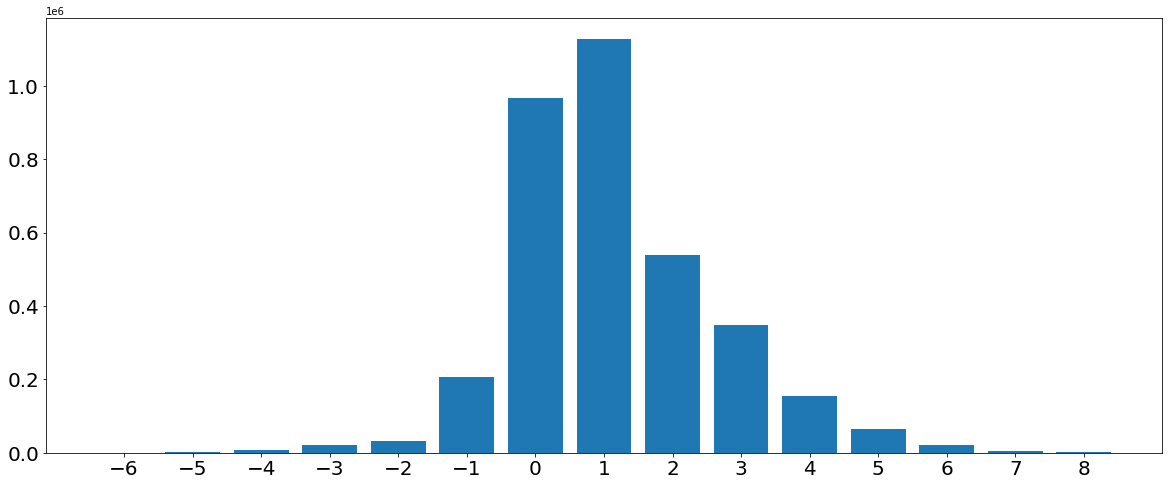

In [21]:
import matplotlib.pyplot as plt

  #analisis positif atau negatif kalimat
pos_list=open('./kata_positif.txt','r')
pos_kata=pos_list.readlines()
neg_list=open('./kata_negatif.txt','r')
neg_kata=neg_list.readlines()


sentiment=[]
for item in hasil:
  count_p = 0
  count_n = 0
  for kata_pos in pos_kata:
    if kata_pos.strip() in item:
      count_p +=1
  for kata_neg in neg_kata:
    if kata_neg.strip() in item:
      count_n +=1
    sentiment.append(count_p - count_n)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
fs = 20

labels, counts = np.unique(sentiment, return_counts = True)
plt.bar(labels, counts, align = 'center')
plt.gca().set_xticks(labels)
ax.tick_params(axis="x", labelsize = fs)
ax.tick_params(axis="y", labelsize = fs)

print("Nilai rata-rata\t: ", np.round(np.mean(sentiment),8))
print("Nilai Median\t: ", np.round(np.median(sentiment),8))
print("Standar deviasi\t: ", np.round(np.std(sentiment),8))
print("Kesimpulan\t: Dengan adanya Vaksin masyrakat relatif bersikap positif. Kurva histogram menunjukkan adanya skewness yang positif(histogram berat disebelah kanan). Artinya, variasi komentar positif lebih banyak daripada variasi komentar negatif.")
print('\n------------------------------\n')
plt.show()

In [22]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to C:\Users\Aspire
[nltk_data]     5\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [23]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#gabungin jadi paragraf
paragraf=' '.join(hasil)
print(paragraf)
print('----------------------------------------------------------')

#Hapus stopwords
stop_words = set(stopwords.words('indonesian'))

#tokenize
word_tokens=word_tokenize(paragraf)
print(word_tokens)

#hapus stopwords
paragraf_2=' '.join([w for w in word_tokens if not w in stop_words])
print(paragraf_2)


china tegas tidaak akan laku vaksin masal pada rakyat walau sudah milik belum jamin bahwa org yg di vaksin bebas dari tular covid bahkan tdk ada obat seluruh dunia tentang flu kebal dari virus flu itu alami ada kekawatiran vaksin tdk halal spt yg sering ucap p wapres proses uji klinis vaksin tahap tiga belum ada lapor negatif para dokter sering papar sukarelawa vaksin corona di brasil tinggal ini rupa kabar mati pertama yang lapor dalam rangkai uji coba vaksin yang tengah langsung di seluruh dunia menristek tekan penting vaksin demi bentuk kebal massal bambang tambah vaksin yang nanti dapat izin dari badan awas obat dan makan bpom adalah vaksin yang sudah penuh syarat aman dan manjur safety ampamp perintah kota depok akan gelar simulasi prosedur alur vaksinasi di depok bagai siap jelang beri vaksin imunitas dari vaksin menristek beber mungkin tidak tahan umur hidup coronavirus corona covid indonesia indonesiadalambahaya indonesian dapat untuk android via vaksin covid kira selesai tenga

['china', 'tegas', 'tidaak', 'akan', 'laku', 'vaksin', 'masal', 'pada', 'rakyat', 'walau', 'sudah', 'milik', 'belum', 'jamin', 'bahwa', 'org', 'yg', 'di', 'vaksin', 'bebas', 'dari', 'tular', 'covid', 'bahkan', 'tdk', 'ada', 'obat', 'seluruh', 'dunia', 'tentang', 'flu', 'kebal', 'dari', 'virus', 'flu', 'itu', 'alami', 'ada', 'kekawatiran', 'vaksin', 'tdk', 'halal', 'spt', 'yg', 'sering', 'ucap', 'p', 'wapres', 'proses', 'uji', 'klinis', 'vaksin', 'tahap', 'tiga', 'belum', 'ada', 'lapor', 'negatif', 'para', 'dokter', 'sering', 'papar', 'sukarelawa', 'vaksin', 'corona', 'di', 'brasil', 'tinggal', 'ini', 'rupa', 'kabar', 'mati', 'pertama', 'yang', 'lapor', 'dalam', 'rangkai', 'uji', 'coba', 'vaksin', 'yang', 'tengah', 'langsung', 'di', 'seluruh', 'dunia', 'menristek', 'tekan', 'penting', 'vaksin', 'demi', 'bentuk', 'kebal', 'massal', 'bambang', 'tambah', 'vaksin', 'yang', 'nanti', 'dapat', 'izin', 'dari', 'badan', 'awas', 'obat', 'dan', 'makan', 'bpom', 'adalah', 'vaksin', 'yang', 'sudah',

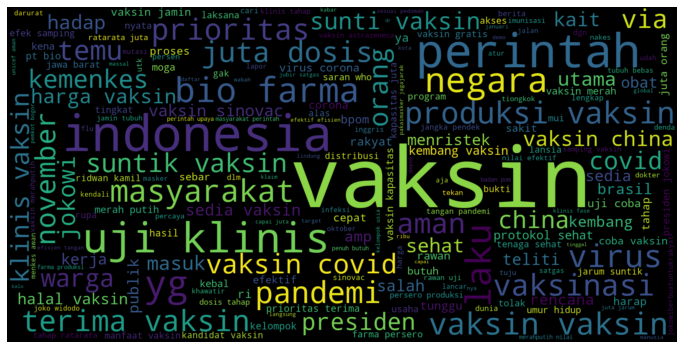

In [24]:
#Visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(paragraf_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
count=df['PADESC'].value_counts()
count

,length,ID,Date,Source,user,Likes,tweet,Clean
0,145,1319065127811837952,2020-10-21 23:56:48,Twitter for Android,syarifptk,0,*China Tegas Tidaak Akan Lakukan Vaksin Covid-...,china tegas tidaak akan laku vaksin masal pada...
1,228,1319064780934574080,2020-10-21 23:55:25,Twitter Web App,sumoburloff,0,@geloraco Belum menjamin bahwa org yg di vaksi...,belum jamin bahwa org yg di vaksin bebas dari ...
2,119,1319063552938799106,2020-10-21 23:50:32,dlvr.it,FaktaNew5,0,Proses Uji Klinis Vaksin COVID-19 Tahap Tiga: ...,proses uji klinis vaksin tahap tiga belum ada ...
3,60,1319062462235172865,2020-10-21 23:46:12,idntimes live blog,idntimes,0,Para dokter sering terpapar COVID-19 https://t...,para dokter sering papar
4,220,1319060465918464000,2020-10-21 23:38:16,Twitter for Android,chirp__john,0,Sukarelawa Vaksin Corona di Brasil Meninggal.\...,sukarelawa vaksin corona di brasil tinggal ini...
...,...,...,...,...,...,...,...,...
988,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,Presiden Joko Widodo atau Jokowi meminta komun...,presiden joko widodo atau jokowi minta komunik...
989,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
990,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
991,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,"Edukasi vaksin covid-19 perlu disiapkan betul""...",edukasi vaksin perlu siap betul agar masyaraka...


In [34]:
df2=df.sort_values(by=['Likes'], ascending=False)
df2.iloc[:,1:100]

,ID,Date,Source,user,Likes,tweet,Clean
399,1318716719414669312,2020-10-21 00:52:21,Twitter for Android,drpriono1,959,Perhimpunan Dokter Penyakit Dalam sudah bersua...,himpun dokter sakit dalam sudah suara vaksin h...
166,1318859238769192962,2020-10-21 10:18:40,Twitter for Android,drpriono1,221,Jangan Berguyon dengan Vaksinasi Covid-19. Bet...,jangan guyon dengan vaksinasi betapa sulit ban...
619,1318488953113071618,2020-10-20 09:47:17,Twitter for Android,NewsMuslimah,217,MuslimahNews – Wajar jika rakyat meragukan keb...,muslimahnews wajar jika rakyat ragu bijak peri...
153,1318864631062999040,2020-10-21 10:40:06,Echobox,detikcom,187,Sebanyak 5 warga Korea Selatan dilaporkan meni...,banyak warga korea selatan lapor tinggal dunia...
75,1318925660501340161,2020-10-21 14:42:36,Twitter for Android,SaveMoslem1,157,ADA YANG BISA MENJELASKAN..? KALAU TOLAK OBAT ...,ada yang bisa jelas kalau tolak obat dan vaksi...
...,...,...,...,...,...,...,...
435,1318690729271545856,2020-10-20 23:09:04,Twitter for iPhone,PemkotaBogor,0,Presiden: Persiapkan Rencana Vaksin Covid-19 d...,presiden siap rencana vaksin dengan baik pemko...
436,1318690225304989697,2020-10-20 23:07:04,Twitter Web App,indoposonline,0,Menteri Riset dan Teknologi (Menristek) Bamban...,menteri riset dan teknologi menristek bambang ...
437,1318679676009746435,2020-10-20 22:25:09,IFTTT,KalbarOnline,0,"Vaksin Covid-19 Prioritas Usia 18-59 Tahun, Ba...",vaksin prioritas usia tahun bagaimana dengan anak
439,1318675873172615168,2020-10-20 22:10:02,dlvr.it,Natural45,0,Vaksin Bukan Jaminan 'Kebal' COVID-19 Seumur H...,vaksin bukan jamin kebal umur hidup ini pesan ...


In [43]:
df2=df2.loc[df['Likes']>= 50]
df2

,length,ID,Date,Source,user,Likes,tweet,Clean
399,302,1318716719414669312,2020-10-21 00:52:21,Twitter for Android,drpriono1,959,Perhimpunan Dokter Penyakit Dalam sudah bersua...,himpun dokter sakit dalam sudah suara vaksin h...
166,306,1318859238769192962,2020-10-21 10:18:40,Twitter for Android,drpriono1,221,Jangan Berguyon dengan Vaksinasi Covid-19. Bet...,jangan guyon dengan vaksinasi betapa sulit ban...
619,277,1318488953113071618,2020-10-20 09:47:17,Twitter for Android,NewsMuslimah,217,MuslimahNews – Wajar jika rakyat meragukan keb...,muslimahnews wajar jika rakyat ragu bijak peri...
153,200,1318864631062999040,2020-10-21 10:40:06,Echobox,detikcom,187,Sebanyak 5 warga Korea Selatan dilaporkan meni...,banyak warga korea selatan lapor tinggal dunia...
75,175,1318925660501340161,2020-10-21 14:42:36,Twitter for Android,SaveMoslem1,157,ADA YANG BISA MENJELASKAN..? KALAU TOLAK OBAT ...,ada yang bisa jelas kalau tolak obat dan vaksi...
522,306,1318542739961638912,2020-10-20 13:21:01,Twitter for Android,dirgarambe,152,Bagaimana tahapan pengembangan vaksin? Bagaim...,bagaimana tahap kembang vaksin bagaimana cara ...
105,304,1318899291054776320,2020-10-21 12:57:49,Twitter for Android,drpriono1,111,Komunikasi Publik pemerintah sangat buruk seja...,komunikasi publik perintah sangat buruk sejak ...
174,84,1318854015082323968,2020-10-21 09:57:54,Twitter Web App,Ronnie_Rusli,94,Vaksin buatan AstraZeneca paling bagus dari se...,vaksin buat astrazeneca paling bagus dari semu...
265,283,1318791985881255936,2020-10-21 05:51:26,Twitter for iPhone,dr_koko28,92,"Jadi untuk tahu vaksin itu berhasil apa nggak,...",jadi untuk tahu vaksin itu hasil apa nggak raw...
284,147,1318783707730227200,2020-10-21 05:18:32,Twitter for iPhone,FerdinandHaean3,91,Warga Cina sdh mulai menerima vaksinasi covid-...,warga cina sdh mulai terima vaksinasi antri li...


In [38]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


'C:\Users\Aspire' is not recognized as an internal or external command,
operable program or batch file.


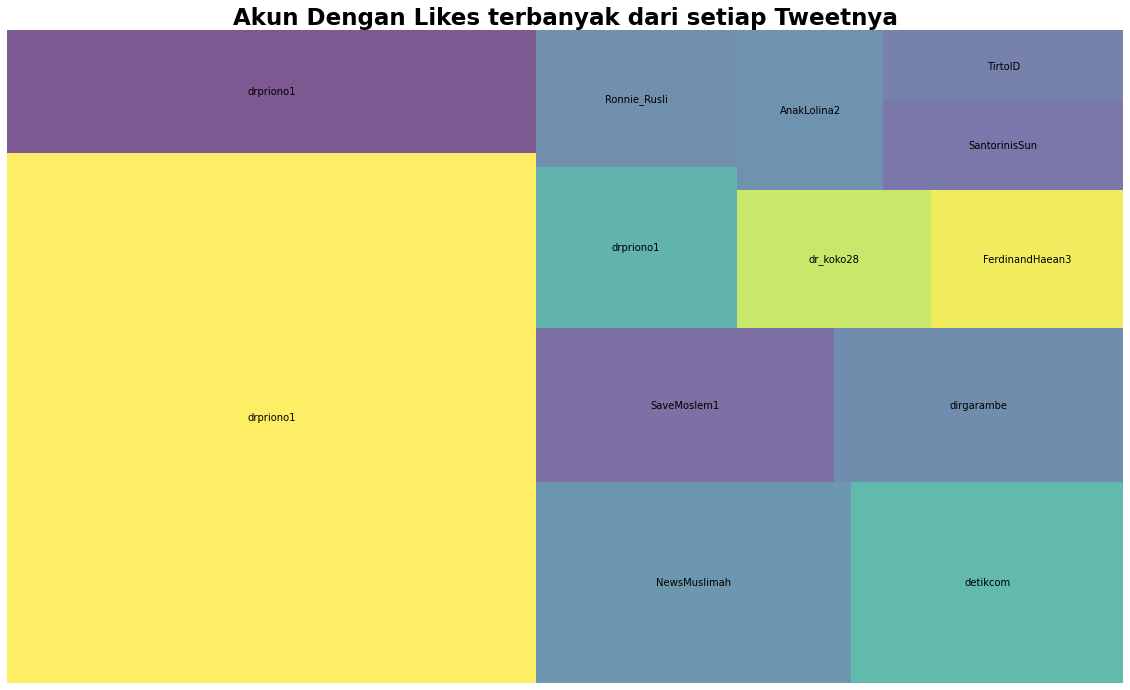

In [45]:
# libraries
plt.figure(figsize=(20,12))
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=df2['Likes'], label=df2['user'], alpha=.7 )
plt.axis('off')
plt.title("Akun Dengan Likes terbanyak dari setiap Tweetnya",fontsize=23,fontweight="bold")
plt.show()

In [52]:
df2['tweet'][399]

'Perhimpunan Dokter Penyakit Dalam sudah bersuara: "Vaksin harus terbukti "EFEKTIF dan AMAN". Kita masih tunggu suara nakes yang lain, yang selama ini tidak pernah dilibatkan dalam proses vaksinasi Covid-19. Jangan tergesa-gesa...Ini bukan kondisi darurat harus diberikan vaksin. https://t.co/VnQoHUp0hO'

# Ambil  Data Twitter  Dalam 3 Hari

In [4]:
# Full data 
search_words = ("vaksin OR VAKSIN OR Vaksin COVID-19" )
date_since = "2020-10-20"
end_date="2020-10-23"
new_search = search_words + " -filter:retweets"

tweets = tweepy.Cursor(api.search,
                        q=new_search,
                        lang="id",
                        since=date_since,until=end_date,
                        tweet_mode='extended').items()
ciptaker= [[len(tweet.full_text),tweet.id,tweet.created_at,tweet.source,tweet.user.screen_name,tweet.retweet_count,tweet.favorite_count,tweet.full_text] for tweet in tweets]
data = pd.DataFrame(data=ciptaker, 
                    columns=['length','ID','Date','Source','user','Retweet','Likes', "tweet"])
data

,length,ID,Date,Source,user,Retweet,Likes,tweet
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,5,15,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa..."
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,27,72,"LOL padahal menlu udah gembar-gembor ""mengaman..."
...,...,...,...,...,...,...,...,...
1866,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...
1867,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1868,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1869,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""..."


In [6]:
data

,length,ID,Date,Source,user,Retweet,Likes,tweet
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,5,15,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa..."
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,27,72,"LOL padahal menlu udah gembar-gembor ""mengaman..."
...,...,...,...,...,...,...,...,...
1866,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...
1867,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1868,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1869,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""..."


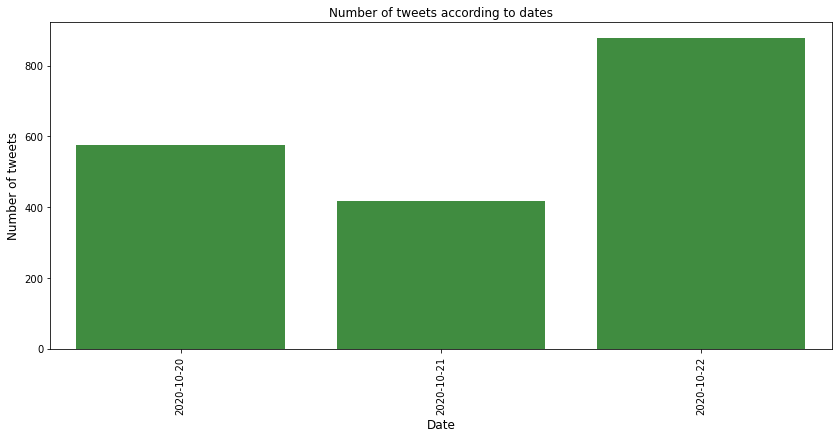

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
#Banyak tweet bedasarkan tanggal 
#lets explore created_at column
data['Date'] =  pd.to_datetime(data['Date'])
cnt_srs = data['Date'].dt.date.value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='green')
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.title("Number of tweets according to dates")
plt.show()

# Save dataset ke SQLite

In [66]:
#save data di sql 
from sqlalchemy import create_engine
def save_sql(file,table):
  engine = create_engine(file, echo=True)
  sqlite_connection = engine.connect()
  sqlite_table =table
  df.to_sql(sqlite_table, sqlite_connection, if_exists='fail')
  sqlite_connection.close()

In [67]:
file='sqlite:///TugasAkhir_Sanber.db'
table='Vaksin3'
save_sql(file,table)

2020-10-23 15:47:26,445 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2020-10-23 15:47:26,446 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 15:47:26,448 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2020-10-23 15:47:26,449 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 15:47:26,455 INFO sqlalchemy.engine.base.Engine PRAGMA main.table_info("Vaksin3")
2020-10-23 15:47:26,456 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 15:47:26,457 INFO sqlalchemy.engine.base.Engine PRAGMA temp.table_info("Vaksin3")
2020-10-23 15:47:26,458 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 15:47:26,460 INFO sqlalchemy.engine.base.Engine 
CREATE TABLE "Vaksin3" (
	"index" BIGINT, 
	length BIGINT, 
	"ID" BIGINT, 
	"Date" DATETIME, 
	"Source" TEXT, 
	user TEXT, 
	"Retweet" BIGINT, 
	"Likes" BIGINT, 
	tweet TEXT
)


2020-10-23 15:47:26,461 INFO sqlalchemy.engine.base.Engine ()
2020-10-23 15:47:26,512 INFO

In [68]:
import sqlite3
import numpy as np
#fungsi opendatabase
def open_database(file):
  conn = sqlite3.connect(file)
  df = pd.read_sql_query("SELECT * FROM Vaksin2", conn)
  print(df)


file='TugasAkhir_Sanber.db'
open_database(file)

     index  length                   ID                        Date  \
0        0     145  1319065127811837952  2020-10-21 23:56:48.000000   
1        1     228  1319064780934574080  2020-10-21 23:55:25.000000   
2        2     119  1319063552938799106  2020-10-21 23:50:32.000000   
3        3      60  1319062462235172865  2020-10-21 23:46:12.000000   
4        4     220  1319060465918464000  2020-10-21 23:38:16.000000   
..     ...     ...                  ...                         ...   
988    988     193  1318341161359081472  2020-10-20 00:00:01.000000   
989    989     205  1318341160998416386  2020-10-20 00:00:01.000000   
990    990     205  1318341160449069066  2020-10-20 00:00:00.000000   
991    991     226  1318341158632869891  2020-10-20 00:00:00.000000   
992    992     299  1318341158108614656  2020-10-20 00:00:00.000000   

                  Source          user  Likes  \
0    Twitter for Android     syarifptk      0   
1        Twitter Web App   sumoburloff      0   


In [9]:
df=data
df

,length,ID,Date,Source,user,Retweet,Likes,tweet
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,5,15,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa..."
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,27,72,"LOL padahal menlu udah gembar-gembor ""mengaman..."
...,...,...,...,...,...,...,...,...
1866,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...
1867,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1868,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...
1869,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""..."


# Menghitung  Rata-rata banyak tweet Perwaktu

In [71]:
future_date=df['Date'].iloc[0]
past_date=df['Date'].iloc[1871]
difference = (future_date - past_date)

total_seconds = difference.total_seconds()

total_seconds

258960.0

In [72]:
total_minute=total_seconds/60
print(total_minute)

Total_hour=total_seconds/3600
print(Total_hour)

banyak_tweet=len(df['tweet'])
print(banyak_tweet)

4316.0
71.93333333333334
1872


In [73]:
tweet_perdetik=banyak_tweet/total_seconds
tweet_permenit=banyak_tweet/total_minute
tweet_perjam=banyak_tweet/Total_hour
print('Rata-rata banyak tweet per detik',tweet_perdetik)
print('Rata-rata banyak tweet per menit',tweet_permenit)
print('Rata-rata banyak tweet per jam',tweet_perjam)

Rata-rata banyak tweet per detik 0.007228915662650603
Rata-rata banyak tweet per menit 0.43373493975903615
Rata-rata banyak tweet per jam 26.02409638554217


# Clean Dataset

In [10]:
#Cleaning dataset

import re, string
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import re


clean_tweet=[]
for tweet in df['tweet']:
  def lower(tweet):
    tweet= df['tweet'].str.lower()
    print(tweet)
    return tweet

  def hapus_tanda(tweet):
    tanda_baca=set(string.punctuation)
    tweet=''.join(ch for ch in tweet if ch not in tanda_baca)
    return tweet

  def kata_double(s):
        pattern=re.compile(r'(.)\1{1,}',re.DOTALL)
        return pattern.sub(r'\1\1',s)
  tweet=re.sub(r'\\u\w\w\w\w','',tweet)
  tweet=re.sub(r'http\S+','',tweet)
  #hapus username
  tweet=re.sub('@[^\s]+','',tweet)
  #hapus tagar
  tweet=re.sub('#([^\s]+)',r'\1',tweet)
  #hapus tanda baca
  tweet=hapus_tanda(tweet)
  #hapus angka dan angka yang di dalam string
  tweet=re.sub(r'\w*\d\w*','',tweet).strip()
  #hapus repitisi karakter
  tweet=kata_double(tweet)
  #stemming
  factory=StemmerFactory()
  stemmer=factory.create_stemmer()
  tweet=stemmer.stem(tweet)
  clean_tweet.append(tweet)
df['Clean']=clean_tweet
df  


,length,ID,Date,Source,user,Retweet,Likes,tweet,Clean
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...,satgas minta masyarakat cermat pilah informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...,sobat ibs idi ungkap ragu tentang vaksin covid...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...,beritaterkini tahaptahap kembang vaksin hingga...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,5,15,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa...",gubernur jabar damping pjs wali kota depok ded...
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,27,72,"LOL padahal menlu udah gembar-gembor ""mengaman...",lol padahal menlu udah gembargembor aman juta ...
...,...,...,...,...,...,...,...,...,...
1866,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...,presiden joko widodo atau jokowi minta komunik...
1867,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1868,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1869,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""...",edukasi vaksin perlu siap betul agar masyaraka...


In [11]:
hasil=df['Clean']
hasil = [' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(r'[^\w]')|(\w+:\/\/\S+)", " ", item).split()) for item in hasil]
hasil

['satgas minta masyarakat cermat pilah informasi kait vaksin',
 'sobat ibs idi ungkap ragu tentang vaksin covid bagaimana dengan sobat semua simak lapor ikut',
 'beritaterkini tahaptahap kembang vaksin hingga produksi massal lengkap',
 'gubernur jabar damping pjs wali kota depok dedi supandi tinjau giat simulasi vaksin di puskesmas tapos kamis pplhiupdate kinerjaridwankamil rkjabarjuara ridwankamil jabarjuaralahirbatin',
 'lol padahal menlu udah gembargembor aman juta dosis vaksin bahkan sampe ke inggris tanda tangan letter of intent',
 'himpun dokter spesialis sakit dalam indonesia papdi minta perintah tdk laku vaksinasi papdi minta vaksin itu sdh bukti efektif aman amp imunogenisitasnya lewat uji klinik sesuai tahap kembang vaksin baru pagiindah',
 'deret fakta rawan vaksin astrazeneca tinggal',
 'gubjabar siap untuk terima vaksin bodebek adalah wilayah pertama jabar yang akan mnjdi lokasi sunti vaksin kota depok wilayah pertma mnjadi tmpt vaksinasi pplhiupdate',
 'dosen iki lek gak 

# Analisis Sentimen

Nilai rata-rata	:  1.00900868
Nilai Median	:  1.0
Standar deviasi	:  1.51691088
Kesimpulan	: Dengan adanya Vaksin masyrakat relatif bersikap positif. Kurva histogram menunjukkan adanya skewness yang positif(histogram berat disebelah kanan). Artinya, variasi komentar positif lebih banyak daripada variasi komentar negatif.

------------------------------



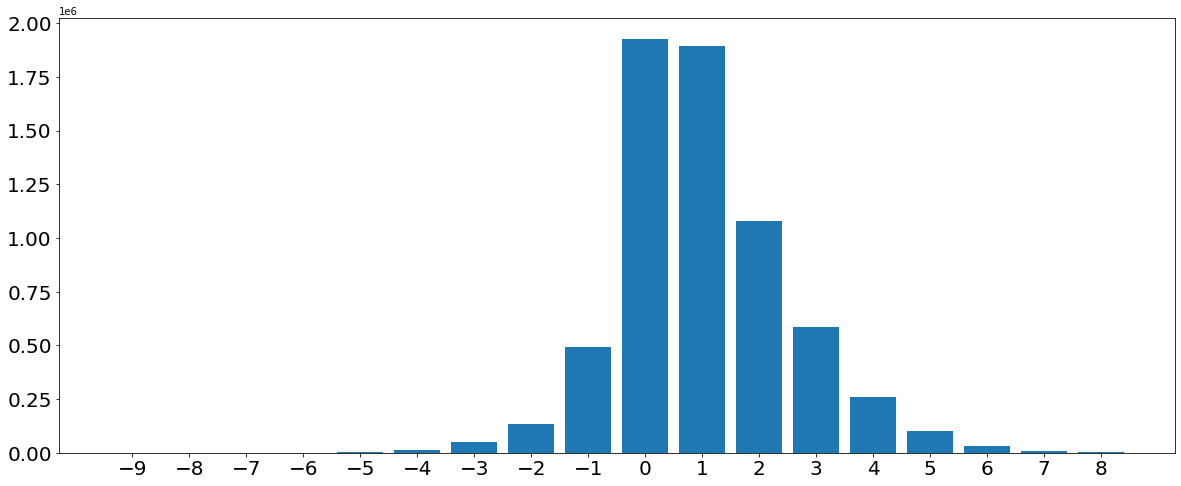

In [14]:
import matplotlib.pyplot as plt
import numpy as np

  #analisis positif atau negatif kalimat
pos_list=open('./kata_positif.txt','r')
pos_kata=pos_list.readlines()
neg_list=open('./kata_negatif.txt','r')
neg_kata=neg_list.readlines()


sentiment=[]
for item in hasil:
  count_p = 0
  count_n = 0
  for kata_pos in pos_kata:
    if kata_pos.strip() in item:
      count_p +=1
  for kata_neg in neg_kata:
    if kata_neg.strip() in item:
      count_n +=1
    sentiment.append(count_p - count_n)

fig = plt.figure(figsize=(20,8))
ax = fig.gca()
fs = 20

labels, counts = np.unique(sentiment, return_counts = True)
plt.bar(labels, counts, align = 'center')
plt.gca().set_xticks(labels)
ax.tick_params(axis="x", labelsize = fs)
ax.tick_params(axis="y", labelsize = fs)

print("Nilai rata-rata\t: ", np.round(np.mean(sentiment),8))
print("Nilai Median\t: ", np.round(np.median(sentiment),8))
print("Standar deviasi\t: ", np.round(np.std(sentiment),8))
print("Kesimpulan\t: Dengan adanya Vaksin masyrakat relatif bersikap positif. Kurva histogram menunjukkan adanya skewness yang positif(histogram berat disebelah kanan). Artinya, variasi komentar positif lebih banyak daripada variasi komentar negatif.")
print('\n------------------------------\n')
plt.show()

In [87]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#gabungin jadi paragraf
paragraf=' '.join(hasil)
print(paragraf)
print('----------------------------------------------------------')

#Hapus stopwords
stop_words = set(stopwords.words('indonesian'))

#tokenize
word_tokens=word_tokenize(paragraf)
print(word_tokens)

#hapus stopwords
paragraf_2=' '.join([w for w in word_tokens if not w in stop_words])
print(paragraf_2)


satgas minta masyarakat cermat pilah informasi kait vaksin sobat ibs idi ungkap ragu tentang vaksin covid bagaimana dengan sobat semua simak lapor ikut beritaterkini tahaptahap kembang vaksin hingga produksi massal lengkap gubernur jabar damping pjs wali kota depok dedi supandi tinjau giat simulasi vaksin di puskesmas tapos kamis pplhiupdate kinerjaridwankamil rkjabarjuara ridwankamil jabarjuaralahirbatin lol padahal menlu udah gembargembor aman juta dosis vaksin bahkan sampe ke inggris tanda tangan letter of intent himpun dokter spesialis sakit dalam indonesia papdi minta perintah tdk laku vaksinasi papdi minta vaksin itu sdh bukti efektif aman amp imunogenisitasnya lewat uji klinik sesuai tahap kembang vaksin baru pagiindah deret fakta rawan vaksin astrazeneca tinggal gubjabar siap untuk terima vaksin bodebek adalah wilayah pertama jabar yang akan mnjdi lokasi sunti vaksin kota depok wilayah pertma mnjadi tmpt vaksinasi pplhiupdate dosen iki lek gak salah yo kelompok prioritas untuk 

# Visualisasi 

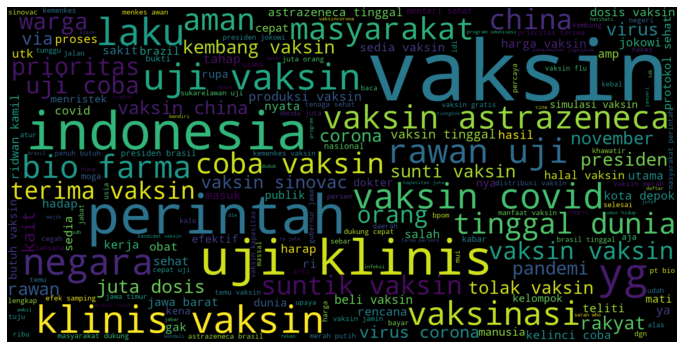

In [88]:
#Visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(width=1600,height=800,max_font_size=200).generate(paragraf_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [94]:
df=df.drop(['sentiment'], axis=1)

In [95]:
df

,length,ID,Date,Source,user,Retweet,Likes,tweet,Clean
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...,satgas minta masyarakat cermat pilah informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...,sobat ibs idi ungkap ragu tentang vaksin covid...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...,beritaterkini tahaptahap kembang vaksin hingga...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,4,9,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa...",gubernur jabar damping pjs wali kota depok ded...
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,22,66,"LOL padahal menlu udah gembar-gembor ""mengaman...",lol padahal menlu udah gembargembor aman juta ...
...,...,...,...,...,...,...,...,...,...
1867,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...,presiden joko widodo atau jokowi minta komunik...
1868,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1869,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1870,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""...",edukasi vaksin perlu siap betul agar masyaraka...


In [15]:
df2=df.sort_values(by=['Likes'], ascending=False)
df2=df2.loc[df['Likes']>= 100]
df2

,length,ID,Date,Source,user,Retweet,Likes,tweet,Clean
390,91,1319220002084417537,2020-10-22 10:12:13,Twitter for Android,ChristWamea,332,1159,IDI Surati Menkes Terawan: Jangan Asal Main Su...,idi surati menkes awan jangan asal main suntik...
1278,302,1318716719414669312,2020-10-21 00:52:21,Twitter for Android,drpriono1,583,969,Perhimpunan Dokter Penyakit Dalam sudah bersua...,himpun dokter sakit dalam sudah suara vaksin h...
556,80,1319177736452071425,2020-10-22 07:24:16,Twitter for Android,geloraco,373,710,"Innalillahi, Peserta Uji Vaksin Covid-19 Menin...",innalillahi serta uji vaksin tinggal dunia
876,294,1319066803855855623,2020-10-22 00:03:27,SocialFlow,BBCIndonesia,343,655,"Presiden Brasil, Jair Bolsonaro, menyatakan pi...",presiden brasil jair bolsonaro nyata pihak tid...
720,120,1319129485795471360,2020-10-22 04:12:32,Twitter for Android,DonAdam68,147,450,Lalu untuk apa Vqriemxn tsksndlen? \n\n*Kemenk...,lalu untuk apa vqriemxn tsksndlen kemenkes vak...
504,91,1319189605334171648,2020-10-22 08:11:25,Twitter Web App,geloraco,143,415,IDI Surati Menkes Terawan: Jangan Asal Main Su...,idi surati menkes awan jangan asal main suntik...
393,120,1319219330853163008,2020-10-22 10:09:33,dlvr.it,kumparan,186,350,Relawan vaksin AstraZeneca itu berusia 28 tahu...,rawan vaksin astrazeneca itu usia tahun ia hil...
389,63,1319220367408254977,2020-10-22 10:13:40,Twitter for Android,VADUKA___KOLAK,103,335,Innalillahi Benarkah ini sobat? 😱\n\nHmmm http...,innalillahi benar ini sobat hmm
432,279,1319207933100449792,2020-10-22 09:24:15,Twitter for Android,Aiek_Channel,179,312,"Innalillahi, Peserta Uji Vaksin Mati\nhttps://...",innalillahi serta uji vaksin mati suntik vaksi...
499,80,1319190989769076736,2020-10-22 08:16:56,Twitter for Android,PutraErlangga_,135,308,"Innalillahi, Peserta Uji Vaksin Covid-19 Menin...",innalillahi serta uji vaksin tinggal dunia


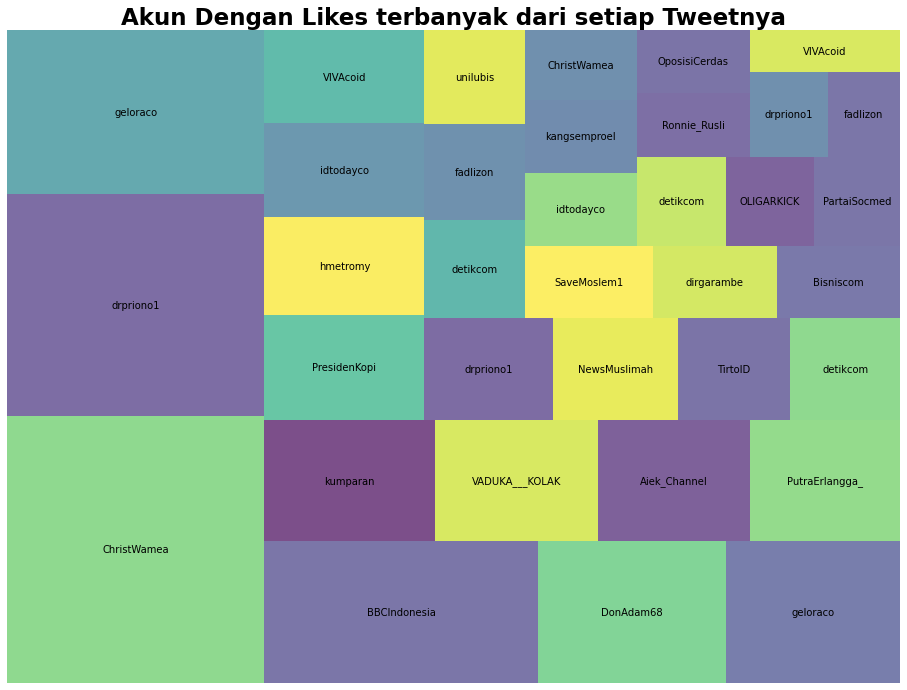

In [26]:
# libraries
plt.figure(figsize=(16,12))
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
 
# If you have 2 lists
squarify.plot(sizes=df2['Likes'], label=df2['user'], alpha=.7 )
plt.axis('off')
plt.title("Akun Dengan Likes terbanyak dari setiap Tweetnya",fontsize=23,fontweight="bold")
plt.show()

In [18]:
#most retweet
df3=df.sort_values(by=['Likes'], ascending=False)
df3

,length,ID,Date,Source,user,Retweet,Likes,tweet,Clean
390,91,1319220002084417537,2020-10-22 10:12:13,Twitter for Android,ChristWamea,332,1159,IDI Surati Menkes Terawan: Jangan Asal Main Su...,idi surati menkes awan jangan asal main suntik...
1278,302,1318716719414669312,2020-10-21 00:52:21,Twitter for Android,drpriono1,583,969,Perhimpunan Dokter Penyakit Dalam sudah bersua...,himpun dokter sakit dalam sudah suara vaksin h...
556,80,1319177736452071425,2020-10-22 07:24:16,Twitter for Android,geloraco,373,710,"Innalillahi, Peserta Uji Vaksin Covid-19 Menin...",innalillahi serta uji vaksin tinggal dunia
876,294,1319066803855855623,2020-10-22 00:03:27,SocialFlow,BBCIndonesia,343,655,"Presiden Brasil, Jair Bolsonaro, menyatakan pi...",presiden brasil jair bolsonaro nyata pihak tid...
720,120,1319129485795471360,2020-10-22 04:12:32,Twitter for Android,DonAdam68,147,450,Lalu untuk apa Vqriemxn tsksndlen? \n\n*Kemenk...,lalu untuk apa vqriemxn tsksndlen kemenkes vak...
...,...,...,...,...,...,...,...,...,...
794,253,1319105459312234497,2020-10-22 02:37:03,Twitter for iPhone,TheRealBobss,0,0,China telah kuasai dunia dan ia bakal lebih ny...,china telah kuasa dunia dan ia bakal lebih nya...
791,97,1319106247333875713,2020-10-22 02:40:11,IDCorner.Co.iD,IDCorner,0,0,Peserta uji vaksin COVID-19 AstraZeneca di Bra...,serta uji vaksin astrazeneca di brazil tinggal...
790,77,1319106253306667008,2020-10-22 02:40:13,Bitly,amirfiqi,0,0,Peserta Uji Vaksin Covid-19 Di Brazil Meningga...,serta uji vaksin di brazil tinggal dunia
789,102,1319106638490431488,2020-10-22 02:41:45,Twitter Web App,ANTARABengkulu,0,0,Peserta uji vaksin COVID-19 AstraZeneca mening...,serta uji vaksin astrazeneca tinggal dunia ant...


In [22]:
print(df3['tweet'][390])
print(df3['tweet'][1278])
print(df3['tweet'][556])
print(df3['tweet'][876])
print(df3['tweet'][720])

IDI Surati Menkes Terawan: Jangan Asal Main Suntik Vaksin Covid-19!
https://t.co/x2a4OZkei5
Perhimpunan Dokter Penyakit Dalam sudah bersuara: "Vaksin harus terbukti "EFEKTIF dan AMAN". Kita masih tunggu suara nakes yang lain, yang selama ini tidak pernah dilibatkan dalam proses vaksinasi Covid-19. Jangan tergesa-gesa...Ini bukan kondisi darurat harus diberikan vaksin. https://t.co/VnQoHUp0hO
Innalillahi, Peserta Uji Vaksin Covid-19 Meninggal Dunia
https://t.co/yRGeXN1I8F
Presiden Brasil, Jair Bolsonaro, menyatakan pihaknya tidak akan membeli vaksin Covid-19 buatan China. "Rakyat Brasil tidak akan menjadi kelinci percobaan siapapun." Hingga kini, uji coba vaksin Sinovac dari China dilakukan di Turki dan Indonesia. https://t.co/MBQiRf0Tt5 https://t.co/BKU8n1caEO
Lalu untuk apa Vqriemxn tsksndlen? 

*Kemenkes: Vaksin Tak Jamin Tubuh Terbebas dari Covid-19.*

https://t.co/kD6zI4ndLK


In [29]:
df['Source'].value_counts()

Twitter for Android                 482
Twitter Web App                     427
dlvr.it                             275
TweetDeck                            95
WordPress.com                        88
Echobox                              76
Twitter for iPhone                   69
IFTTT                                42
roltweet                             29
Hootsuite Inc.                       21
idntimes live blog                   20
twittbot.net                         20
OkezoneMobile                        19
detikcommunity                       19
Twitter Media Studio                 17
Jawapos.com auto tweet               13
micom                                12
IDCorner.Co.iD                       10
JPNN News Update                     10
Twitter for iPad                      8
SocialBee.io v2                       7
medcom_API                            7
Bitly                                 7
beritasatu                            6
Twitter for Mac                       6


In [30]:
df.to_csv('DataTwitter_TugasAkhir.csv',index=False)

In [121]:
translator = Translator()

#df["tweet_translate"] = df["Clean"].map(lambda x: translator.translate(x, src="id", dest="en").text)

In [110]:
df

,length,ID,Date,Source,user,Retweet,Likes,tweet,Clean
0,94,1319427314523000832,2020-10-22 23:56:00,WordPress.com,radar_ntt,0,0,Satgas Minta Masyarakat Cermat Pilah Informasi...,satgas minta masyarakat cermat pilah informasi...
1,161,1319426418095181825,2020-10-22 23:52:26,Twitter for Android,IndoBicaraSehat,0,0,Sobat IBS.. \n\nIDI mengungkapkan keraguannya ...,sobat ibs idi ungkap ragu tentang vaksin covid...
2,117,1319425463564075009,2020-10-22 23:48:38,InfoCOVID-19,InfoCOVID19_id,0,0,#BeritaTerkini\nTahap-tahap Pengembangan Vaksi...,beritaterkini tahaptahap kembang vaksin hingga...
3,302,1319425381053521920,2020-10-22 23:48:19,Twitter for Android,khonsaa6,4,9,"Gubernur Jabar, @ridwankamil didampingi Pjs Wa...",gubernur jabar damping pjs wali kota depok ded...
4,152,1319425366558044160,2020-10-22 23:48:15,Twitter for Android,apathoni,22,66,"LOL padahal menlu udah gembar-gembor ""mengaman...",lol padahal menlu udah gembargembor aman juta ...
...,...,...,...,...,...,...,...,...,...
1867,193,1318341161359081472,2020-10-20 00:00:01,TweetDeck,sarwendut,0,0,Presiden Joko Widodo atau Jokowi meminta komun...,presiden joko widodo atau jokowi minta komunik...
1868,205,1318341160998416386,2020-10-20 00:00:01,Twitter Web App,Tuebakonn_,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1869,205,1318341160449069066,2020-10-20 00:00:00,Twitter Web App,BlackBuggg,0,0,WHO dan pemerintah Indonesia sudah bersepakat ...,who dan perintah indonesia sudah sepakat dan k...
1870,226,1318341158632869891,2020-10-20 00:00:00,Twitter Web App,Ahya_21_ADSL,0,0,"Edukasi vaksin covid-19 perlu disiapkan betul""...",edukasi vaksin perlu siap betul agar masyaraka...


# Web Scrapping Kompas

In [114]:
#import library buat scrapping
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
import requests

user_agent='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/602.2.14 (KHTML, like Gecko) Version/10.0.1 Safari/602.2.14'
headers = {'User-Agent': user_agent,'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}

alamat = "https://www.kompas.com/"
req = Request(alamat, headers=headers)
html = urlopen(req)
data = bs(html, 'html.parser')

In [134]:
halo = data.findAll("a", {"class":"article__link"})
halo

[<a class="article__link" href="https://www.kompas.com/motogp/read/2020/10/23/17051638/hasil-fp1-motogp-teruel-2020-honda-merajai-alex-marquez-tercepat">Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, Alex Marquez Tercepat</a>,
 <a class="article__link" href="https://money.kompas.com/read/2020/10/23/200921126/vaksinasi-covid-19-terancam-molor-dari-rencana-pemerintah" target="_parent">Vaksinasi Covid-19 Terancam Molor dari Rencana Pemerintah</a>,
 <a class="article__link" href="https://nasional.kompas.com/read/2020/10/23/20090121/ditanya-dasar-hukum-hapus-satu-pasal-di-uu-cipta-kerja-ini-jawaban-istana" target="_parent">Ditanya Dasar Hukum Hapus Satu Pasal di UU Cipta Kerja, Ini Jawaban Istana</a>,
 <a class="article__link" href="https://www.kompas.com/hype/read/2020/10/23/200731066/rizky-febian-ketika-terjun-ke-dunia-hiburan-ini-resiko-yang-harus-aku-ambil" target="_parent">Rizky Febian: Ketika Terjun ke Dunia Hiburan, Ini Resiko yang Harus Aku Ambil</a>,
 <a class="article__link" href="

In [135]:
table=[]
for text in halo:
    judul=text.get_text()
    print(judul)
    table.append(judul)

Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, Alex Marquez Tercepat
Vaksinasi Covid-19 Terancam Molor dari Rencana Pemerintah
Ditanya Dasar Hukum Hapus Satu Pasal di UU Cipta Kerja, Ini Jawaban Istana
Rizky Febian: Ketika Terjun ke Dunia Hiburan, Ini Resiko yang Harus Aku Ambil
Proyek Jakarta International Stadium Sudah 32 Persen, Kini Pemasangan Rumput Hybrid
Tumbuhkan Keyakinan Wisatawan dengan Penerapan Protokol Kesehatan Covid-19
Pemuda Tewas Disengat Tawon di Kalsel Sempat Ceburkan Diri ke Kubangan Air
Berkas Perkara Djoko Tjandra Dilimpahkan ke PN Tipikor
Rahasia Alam Semesta: Apa Itu Nebula, Fenomena di Tengah Gelapnya Ruang Angkasa?



Semakin Paham dengan ePaper Kompas GRATIS
Tunda Rilis Album, Rizky Febian Kepikiran Bikin Web Series Trilogi Garis Cinta
Tusuk Perut Pemuda Mabuk, Pria Ini Ditangkap
Sinopsis Film The Prom yang Baru Rilis Trailer Perdana
Tokopedia: Penjualan Furnitur Naik Hampir 2 Kali Lipat
Komentar Stefano Pioli soal Kans AC Milan Sabet Scudetto
Sinopsis London

In [136]:
table

['Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, Alex Marquez Tercepat',
 'Vaksinasi Covid-19 Terancam Molor dari Rencana Pemerintah',
 'Ditanya Dasar Hukum Hapus Satu Pasal di UU Cipta Kerja, Ini Jawaban Istana',
 'Rizky Febian: Ketika Terjun ke Dunia Hiburan, Ini Resiko yang Harus Aku Ambil',
 'Proyek Jakarta International Stadium Sudah 32 Persen, Kini Pemasangan Rumput Hybrid',
 'Tumbuhkan Keyakinan Wisatawan dengan Penerapan Protokol Kesehatan Covid-19',
 'Pemuda Tewas Disengat Tawon di Kalsel Sempat Ceburkan Diri ke Kubangan Air',
 'Berkas Perkara Djoko Tjandra Dilimpahkan ke PN Tipikor',
 'Rahasia Alam Semesta: Apa Itu Nebula, Fenomena di Tengah Gelapnya Ruang Angkasa?',
 '\n\n',
 'Semakin Paham dengan ePaper Kompas GRATIS',
 'Tunda Rilis Album, Rizky Febian Kepikiran Bikin Web Series Trilogi Garis Cinta',
 'Tusuk Perut Pemuda Mabuk, Pria Ini Ditangkap',
 'Sinopsis Film The Prom yang Baru Rilis Trailer Perdana',
 'Tokopedia: Penjualan Furnitur Naik Hampir 2 Kali Lipat',
 'Komentar

In [137]:
import pandas as pd
headers = ['Berita']
df = pd.DataFrame(table, columns=headers)
df

,Berita
0,"Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, ..."
1,Vaksinasi Covid-19 Terancam Molor dari Rencana...
2,Ditanya Dasar Hukum Hapus Satu Pasal di UU Cip...
3,"Rizky Febian: Ketika Terjun ke Dunia Hiburan, ..."
4,Proyek Jakarta International Stadium Sudah 32 ...
5,Tumbuhkan Keyakinan Wisatawan dengan Penerapan...
6,Pemuda Tewas Disengat Tawon di Kalsel Sempat C...
7,Berkas Perkara Djoko Tjandra Dilimpahkan ke PN...
8,"Rahasia Alam Semesta: Apa Itu Nebula, Fenomena..."
9,\n\n


In [139]:
df = df.replace('\n','', regex=True)
df

,Berita
0,"Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, ..."
1,Vaksinasi Covid-19 Terancam Molor dari Rencana...
2,Ditanya Dasar Hukum Hapus Satu Pasal di UU Cip...
3,"Rizky Febian: Ketika Terjun ke Dunia Hiburan, ..."
4,Proyek Jakarta International Stadium Sudah 32 ...
5,Tumbuhkan Keyakinan Wisatawan dengan Penerapan...
6,Pemuda Tewas Disengat Tawon di Kalsel Sempat C...
7,Berkas Perkara Djoko Tjandra Dilimpahkan ke PN...
8,"Rahasia Alam Semesta: Apa Itu Nebula, Fenomena..."
9,


In [140]:
df=df.drop([9])

In [141]:
df

,Berita
0,"Hasil FP1 MotoGP Teruel 2020 - Honda Merajai, ..."
1,Vaksinasi Covid-19 Terancam Molor dari Rencana...
2,Ditanya Dasar Hukum Hapus Satu Pasal di UU Cip...
3,"Rizky Febian: Ketika Terjun ke Dunia Hiburan, ..."
4,Proyek Jakarta International Stadium Sudah 32 ...
5,Tumbuhkan Keyakinan Wisatawan dengan Penerapan...
6,Pemuda Tewas Disengat Tawon di Kalsel Sempat C...
7,Berkas Perkara Djoko Tjandra Dilimpahkan ke PN...
8,"Rahasia Alam Semesta: Apa Itu Nebula, Fenomena..."
10,Semakin Paham dengan ePaper Kompas GRATIS


In [148]:
#ambil berita mengenai vaksin 

#import library buat scrapping
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup as bs
import requests

user_agent='Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_1) AppleWebKit/602.2.14 (KHTML, like Gecko) Version/10.0.1 Safari/602.2.14'
headers = {'User-Agent': user_agent,'Accept':'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,*/*;q=0.8'}

alamat = "https://www.kompas.com/tren/read/2020/10/22/115700665/pemerintah-diminta-tak-tergesa-gesa-lakukan-vaksinasi-covid-19?page=all"
req = Request(alamat, headers=headers)
html = urlopen(req)
data = bs(html, 'html.parser')


In [152]:
test = data.find("div",{"class":"read__content"})
test

#hilanhkan iklan
#ambil yang selain iklan
hidelabel=test.findAll('strong')
for delete in hidelabel:
    delete.decompose()


In [153]:
#ambil bagian paragraf
items=test.findAll('p')

hasil=[item.get_text() for item in items]
hasil

[' - Perhimpunan Dokter Spesialis Penyakit Dalam Indonesia ( PAPDI) meminta agar pemerintah tidak tergesa-gesa dalam melakukan vaksinasi Covid-19.',
 'Pernyataan itu disampaikan PAPDI dalam sebuah surat rekomendasi yang diunggah melalui Twitter resmi Pengurus Besar Ikatan Dokter Indonesia (PB IDI).',
 '#vaksincorona jangan tergesa-gesa. pic.twitter.com/OSgROyeRec',
 'Saat dikonfirmasi, Sekretaris Jenderal PAPDI Eka Ginanjar membenarkan surat itu.',
 '"Iya benar," kata Eka saat dihubungi\xa0Kompas.com, Kamis (22/10/2020).',
 'Dalam surat rekomendasi tersebut, PAPDI mendukung segala upaya pemerintah dalam memerangi pandemi virus corona di Indonesia, termasuk program vaksinasi.',
 'PAPDI juga berterima kasih kepada pemerintah atas pengadaan  vaksin Covid-19 untuk masyarakat.',
 '"Berterima kasih kepada pemerintah yang telah berusaha mengadakan vaksin ini untuk masyarakat, termasuk tenaga kesehatan," tulis PAPDI dalam suratnya.',
 '',
 '',
 'Namun, PAPDI meminta vaksin Covid-19 yang akan d

In [154]:
#cleaning data
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

hasil=[item.lower() for item in hasil]
#cleaning data kotor
hasil=[' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", item).split()) for item in hasil]
#gabungin jadi paragraf
paragraf=' '.join(hasil)
print(paragraf)
print('----------------------------------------------------------')

#Hapus stopwords
stop_words = set(stopwords.words('indonesian'))

#tokenize
word_tokens=word_tokenize(paragraf)
print(word_tokens)

#hapus stopwords
paragraf_2=' '.join([w for w in word_tokens if not w in stop_words])
print(paragraf_2)




perhimpunan dokter spesialis penyakit dalam indonesia papdi meminta agar pemerintah tidak tergesa gesa dalam melakukan vaksinasi covid 19 pernyataan itu disampaikan papdi dalam sebuah surat rekomendasi yang diunggah melalui twitter resmi pengurus besar ikatan dokter indonesia pb idi vaksincorona jangan tergesa gesa pic twitter com osgroyerec saat dikonfirmasi sekretaris jenderal papdi eka ginanjar membenarkan surat itu iya benar kata eka saat dihubungi kompas com kamis 22 10 2020 dalam surat rekomendasi tersebut papdi mendukung segala upaya pemerintah dalam memerangi pandemi virus corona di indonesia termasuk program vaksinasi papdi juga berterima kasih kepada pemerintah atas pengadaan vaksin covid 19 untuk masyarakat berterima kasih kepada pemerintah yang telah berusaha mengadakan vaksin ini untuk masyarakat termasuk tenaga kesehatan tulis papdi dalam suratnya   namun papdi meminta vaksin covid 19 yang akan digunakan harus sudah terbukti efektivitas keamanan dan imunogenisitasnya mela

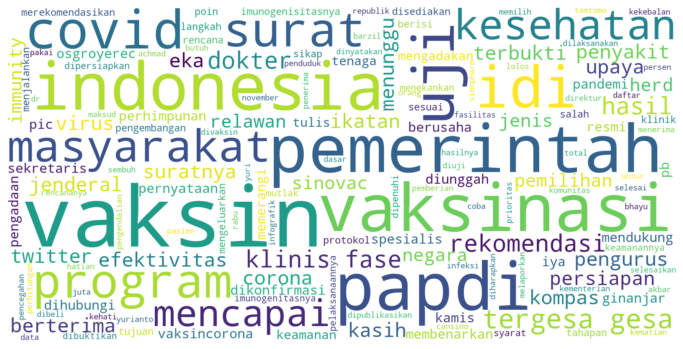

In [155]:
#Visualisasi WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud=WordCloud(width=1600,height=800,max_font_size=200,background_color='white').generate(paragraf_2)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()